In [1]:
from tqdm import tqdm
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import os
from natsort import natsorted

In [ ]:
def plot_snp_coverage(plot_df: pd.DataFrame,
                      sample_name: str,
                      chrom_sizes_dict: dict,
                      centromeres_dict: dict,
                      output_dir: str,) -> None:
    """
    Function to plot SNP coverage for a given sample.

    Parameters
    ----------
    plot_df : pd.DataFrame
        DataFrame containing coverage data.
    sample_name : str
        Name of the sample.
    chrom_sizes_dict : dict
        Dictionary containing chromosome sizes.
    centromeres_dict : dict
        Dictionary containing centromere locations.
    output_dir : str
        Directory to save the plots.

    Returns
    -------
    None
        The function saves the plots to a PDF file.
        
    """

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Open the PDF file to save the plots to
    pdf_path = os.path.join(output_dir,
                            f'{sample_name}_coverage.pdf')
    
    with PdfPages(pdf_path) as pdf:
        
        fig = plt.figure(figsize=(8.5, 11))
        plt.axis('off')  # Hide axes
        
        # Add title and information text
        plt.text(0.5, 0.9, f"SNP Coverage Analysis for {sample_name}", 
                 ha='center', fontsize=20, weight='bold')
        pdf.savefig()
        plt.close()
    
        # Loop through each chromosome and plot the coverage
        chroms_list = natsorted(list(plot_df['chrom'].unique()))
        for chrom in tqdm(chroms_list):
        
            plt.figure(figsize=(10,5), dpi = 300)
            sns.lineplot(data=plot_df[plot_df['chrom'] == str(chrom)],
                         x='window_start',
                         y='coverage')
            
            # Add another lineplot for the mean quality. It should be opaque,
            # on top of the coverage lineplot, and with a different color.
            # sns.lineplot(data=plot_df[plot_df['chrom'] == str(chrom)],
            #                 x='window_start',
            #                 y='quality',
            #                 color='orange',
            #                 alpha=0.5)
            

            plt.title(f'{sample_name} coverage - chromosome {chrom}')
            plt.xlabel('Base position (based on window start position)')
            plt.ylabel('Mean sliding window coverage')

            plt.vlines(x=chrom_sizes_dict[str(chrom)],
                       ymin=0,
                       ymax=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].max(),
                       color='black',
                       linestyle='-',
                       label='End of chromosome')

            plt.hlines(y=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].mean(),
                       xmin=0,
                       xmax=chrom_sizes_dict[str(chrom)],
                       color='red',
                       linestyle='--',
                       label='Mean coverage')

            plt.hlines(y=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].median(),
                       xmin=0,
                       xmax=chrom_sizes_dict[str(chrom)],
                       color='orange',
                       linestyle='--',
                       label='Median coverage')
            
            if chrom in centromeres_dict:
                # Add an opaque rectangle to the plot to highlight the centromere region
                plt.fill_betweenx(y=[0, plot_df[plot_df['chrom'] == str(chrom)]['coverage'].max()],
                                  x1=centromeres_dict[str(chrom)][0],
                                  x2=centromeres_dict[str(chrom)][1],
                                  color='grey',
                                  alpha=0.5,
                                label='Centromere region')

            # Move the legend outside the plot
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
            plt.tight_layout()
            pdf.savefig()
            plt.close()

def simple_plot_snp_coverage(plot_df: pd.DataFrame,
                      sample_name: str,
                      chrom_sizes_dict: dict,
                      output_dir: str,) -> None:
    """
    Function to plot SNP coverage for a given sample. Same as plot_snp_coverage
    but without centromeres.

    Parameters
    ----------
    plot_df : pd.DataFrame
        DataFrame containing coverage data.
    sample_name : str
        Name of the sample.
    chrom_sizes_dict : dict
        Dictionary containing chromosome sizes.
    centromeres_dict : dict
        Dictionary containing centromere locations.
    output_dir : str
        Directory to save the plots.

    Returns
    -------
    None
        The function saves the plots to a PDF file.
        
    """

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Open the PDF file to save the plots to
    pdf_path = os.path.join(output_dir,
                            f'{sample_name}_coverage.pdf')
    
    with PdfPages(pdf_path) as pdf:
        
        fig = plt.figure(figsize=(8.5, 11))
        plt.axis('off')  # Hide axes
        
        # Add title and information text
        plt.text(0.5, 0.9, f"SNP Coverage Analysis for {sample_name}", 
                 ha='center', fontsize=20, weight='bold')
        pdf.savefig()
        plt.close()
    
        # Loop through each chromosome and plot the coverage
        chroms_list = natsorted(list(plot_df['chrom'].unique()))
        for chrom in tqdm(chroms_list):
        
            plt.figure(figsize=(10,5), dpi = 300)
            sns.lineplot(data=plot_df[plot_df['chrom'] == str(chrom)],
                         x='window_start',
                         y='coverage')
            
            # Add another lineplot for the mean quality. It should be opaque,
            # on top of the coverage lineplot, and with a different color.
            # sns.lineplot(data=plot_df[plot_df['chrom'] == str(chrom)],
            #                 x='window_start',
            #                 y='quality',
            #                 color='orange',
            #                 alpha=0.5)
            

            plt.title(f'{sample_name} coverage - chromosome {chrom}')
            plt.xlabel('Base position (based on window start position)')
            plt.ylabel('Mean sliding window coverage')

            plt.vlines(x=chrom_sizes_dict[str(chrom)],
                       ymin=0,
                       ymax=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].max(),
                       color='black',
                       linestyle='-',
                       label='End of chromosome')

            plt.hlines(y=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].mean(),
                       xmin=0,
                       xmax=chrom_sizes_dict[str(chrom)],
                       color='red',
                       linestyle='--',
                       label='Mean coverage')

            plt.hlines(y=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].median(),
                       xmin=0,
                       xmax=chrom_sizes_dict[str(chrom)],
                       color='orange',
                       linestyle='--',
                       label='Median coverage')

            # Move the legend outside the plot
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
            plt.tight_layout()
            pdf.savefig()
            plt.close()

To generate the input data to this notebook, you need to generate a sliding window bed file of the genome or chromosome you want to assess coverage over.

```bash
bedtools makewindows -g <( cut -f 1,2 ~/Projects/REFERENCES/UOA_WAGYU/UOA_Wagyu_1.withY.fa.fai) \
    -w 100000 \
    -s 50000 \
    -i srcwinnum > UOA_Wagyu_1.withY.100Kb.50Kbstep.bed
```

Then you need to intersect this bed file with the VCF file of interest.

```bash
bedtools intersect -a sample01.vcf.gz \
    -b UOA_Wagyu_1.withY.100Kb.50Kbstep.bed \
    -wb > sample01.SNP.bins.tsv
```

In [3]:
# Set the paths to the chrom sizes and centromere files.

CHROM_SIZES = '~/Projects/REFERENCES/UOA_WAGYU/UOA_Wagyu_1.withY.chrom.sizes'
CENTROMERES = '~/Projects/REFERENCES/UOA_WAGYU/wagyu_centromere_location.txt'

# Load the chrom sizes and make a dictionary.
chrom_sizes = pd.read_csv(CHROM_SIZES, sep='\t', header=None,
                          names=['chrom', 'size'])
chrom_sizes_dict = {chrom:size for chrom, size in zip(chrom_sizes['chrom'], chrom_sizes['size'])}


# Load the centromeres and make a dictionary.
centromeres = pd.read_csv(CENTROMERES, sep='\t', header=None,
                          names=['chromosome','start','end'])
centromeres_dict = {k:(v) for k, v in zip(centromeres['chromosome'], zip(centromeres['start'], centromeres['end']))}

# Set the output directory for the plots.
os.makedirs('../SNP_analyses/coverage_plots/Wagyu_Ref', exist_ok=True)

In [4]:
centromeres_dict

{'1': (0, 21927941),
 '2': (3078, 9146847),
 '3': (0, 19091097),
 '4': (9405, 16562382),
 '5': (0, 11583385),
 '6': (0, 15507068),
 '7': (0, 15252090),
 '8': (0, 13181342),
 '9': (25106, 23824845),
 '10': (11414, 14490847),
 '11': (0, 7495894),
 '12': (0, 20301217),
 '13': (20, 8113116),
 '14': (0, 3727365),
 '15': (0, 8589669),
 '16': (0, 15039914),
 '17': (9948, 14040026),
 '18': (354, 7986056),
 '19': (0, 5378690),
 '21': (33130, 16701166),
 '22': (5, 11566283),
 '23': (16988, 14104924),
 '24': (757, 9774165),
 '25': (0, 6795081),
 '26': (8386, 7707465),
 '27': (0, 17580859),
 '28': (0, 12366953),
 '29': (2819, 7606851),
 'X': (38000000, 50000000),
 'Y': (14124633, 16645689)}

In [5]:
col_names = ['chrom','pos','id','ref','alt','qual','filter','info', 'format',
             'sample','window_chrom','window_start','window_end', 'window_id']

# coverage = pd.read_csv('../SNP_analyses/genotypes/clair3_rerun/sample01.clair3.sliding.coverage.tsv',
#                        sep='\t', header=0, names=col_names,
#                        dtype={0:str,
#                               10:str})

In [ ]:
# SAMPLE_NAMES = [f'sample{i:02d}' for i in range(1, 11)]
# SAMPLE_NAMES.extend([f'sample{i}' for i in range(11, 21)])

SAMPLE_NAMES = ['sample01']

for SAMPLE_NAME in SAMPLE_NAMES:
    print(f'Processing {SAMPLE_NAME}')

    # Load the coverage data
    print('Loading coverage data')
    # Update with the path to the TSV files you made earlier
    coverage = pd.read_csv(f'../SNP_analyses/genotypes/SNPs/{SAMPLE_NAME}.SNP.bins.tsv.gz',
                           sep='\t', header=0, names=col_names,
                           dtype={0:str,
                              10:str})
    # Extract the DEPTH from the coverage data
    # This may change depending on how the VCF file is formatted.
    coverage['coverage'] = coverage['sample'].str.split(':').str[2].astype(int)
    coverage = coverage.rename(columns={'qual':'quality'})
    

    print('Generating plotting dataframe')
    plot_df = coverage.groupby(['window_id']).agg({'coverage':'mean',
                                                   'quality':'mean',
                                     'chrom':'first',
                                     'window_start':'first'}).reset_index()
    
    plot_snp_coverage(plot_df=plot_df,
                      sample_name=SAMPLE_NAME,
                      chrom_sizes_dict=chrom_sizes_dict,
                      centromeres_dict=centromeres_dict,
                      output_dir='../SNP_analyses/coverage_plots/Wagyu_Ref')

It should then look something like [this](../docs//sample01_coverage.pdf).

In [ ]:


# for SAMPLE_NAME in SAMPLE_NAMES:
#     print(f'Processing {SAMPLE_NAME}')

#     # Load the coverage data
#     coverage = pd.read_csv(f'../SNP_analyses/genotypes/SNPs/{SAMPLE_NAME}.SNP.bins.tsv.gz',
#                            sep='\t', header=0, names=col_names,
#                            dtype={0:str,
#                               10:str})
#     # Extract the DEPTH from the coverage data
#     coverage['coverage'] = coverage['sample'].str.split(':').str[2].astype(int)

#     plot_df = coverage.groupby(['window_id']).agg({'coverage':'mean',
#                                      'chrom':'first',
#                                      'window_start':'first'}).reset_index()

#     # Open the PDF file to save the plots to
#     pdf_path = os.path.join('../SNP_analyses/coverage_plots/Wagyu_Ref',
#                             f'{SAMPLE_NAME}_coverage.pdf')

#     with PdfPages(pdf_path) as pdf:

#         fig = plt.figure(figsize=(8.5, 11))
#         plt.axis('off')  # Hide axes
        
#         # Add title and information text
#         plt.text(0.5, 0.9, f"SNP Coverage Analysis for {SAMPLE_NAME}", 
#                  ha='center', fontsize=20, weight='bold')
        
#         plt.text(0.5, 0.8, "Red dashed lines = mean coverage", ha='center', fontsize=16)
#         plt.text(0.5, 0.75, "Orange dashed lines = median coverage", ha='center', fontsize=16)
#         plt.text(0.5, 0.7, "Black vertical lines = end of chromosome", ha='center', fontsize=16)
#         plt.text(0.5, 0.65, "Plots are based on sliding window coverage", ha='center', fontsize=16)

#         # Loop through each chromosome and plot the coverage
#         for chrom in tqdm(plot_df['chrom'].unique()):
        
#             plt.figure(figsize=(10,5), dpi = 300)
#             sns.lineplot(data=plot_df[plot_df['chrom'] == str(chrom)],
#                         x='window_start',
#                         y='coverage')
#             plt.title(f'{SAMPLE_NAME} coverage - chromosome {chrom}')
#             plt.xlabel('Base position (based on window start position)')
#             plt.ylabel('Mean sliding window coverage')

#             plt.vlines(x=chrom_sizes_dict[str(chrom)],
#                        ymin=0,
#                        ymax=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].max(),
#                        color='black',
#                        linestyle='-')
            
#             plt.hlines(y=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].mean(),
#                        xmin=0,
#                        xmax=chrom_sizes_dict[str(chrom)],
#                        color='red',
#                        linestyle='--')
            
#             plt.hlines(y=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].median(),
#                        xmin=0,
#                        xmax=chrom_sizes_dict[str(chrom)],
#                        color='orange',
#                        linestyle='--')

#             # Add text in bottom left corner saying orange line is median and red line is mean
#             plt.text(x=-1,
#                      y=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].max() - 1.5,
#                      s='Orange line = median\nRed line = mean\nBlack line = end of chromosome',
#                      fontsize=8,
#                      color='black',
#                      ha='left',
#                      va='bottom')
            
#             pdf.savefig()
#             plt.close()
#     print(f'Finished processing {SAMPLE_NAME} and saved to {pdf_path}')
#     # Close the PDF file


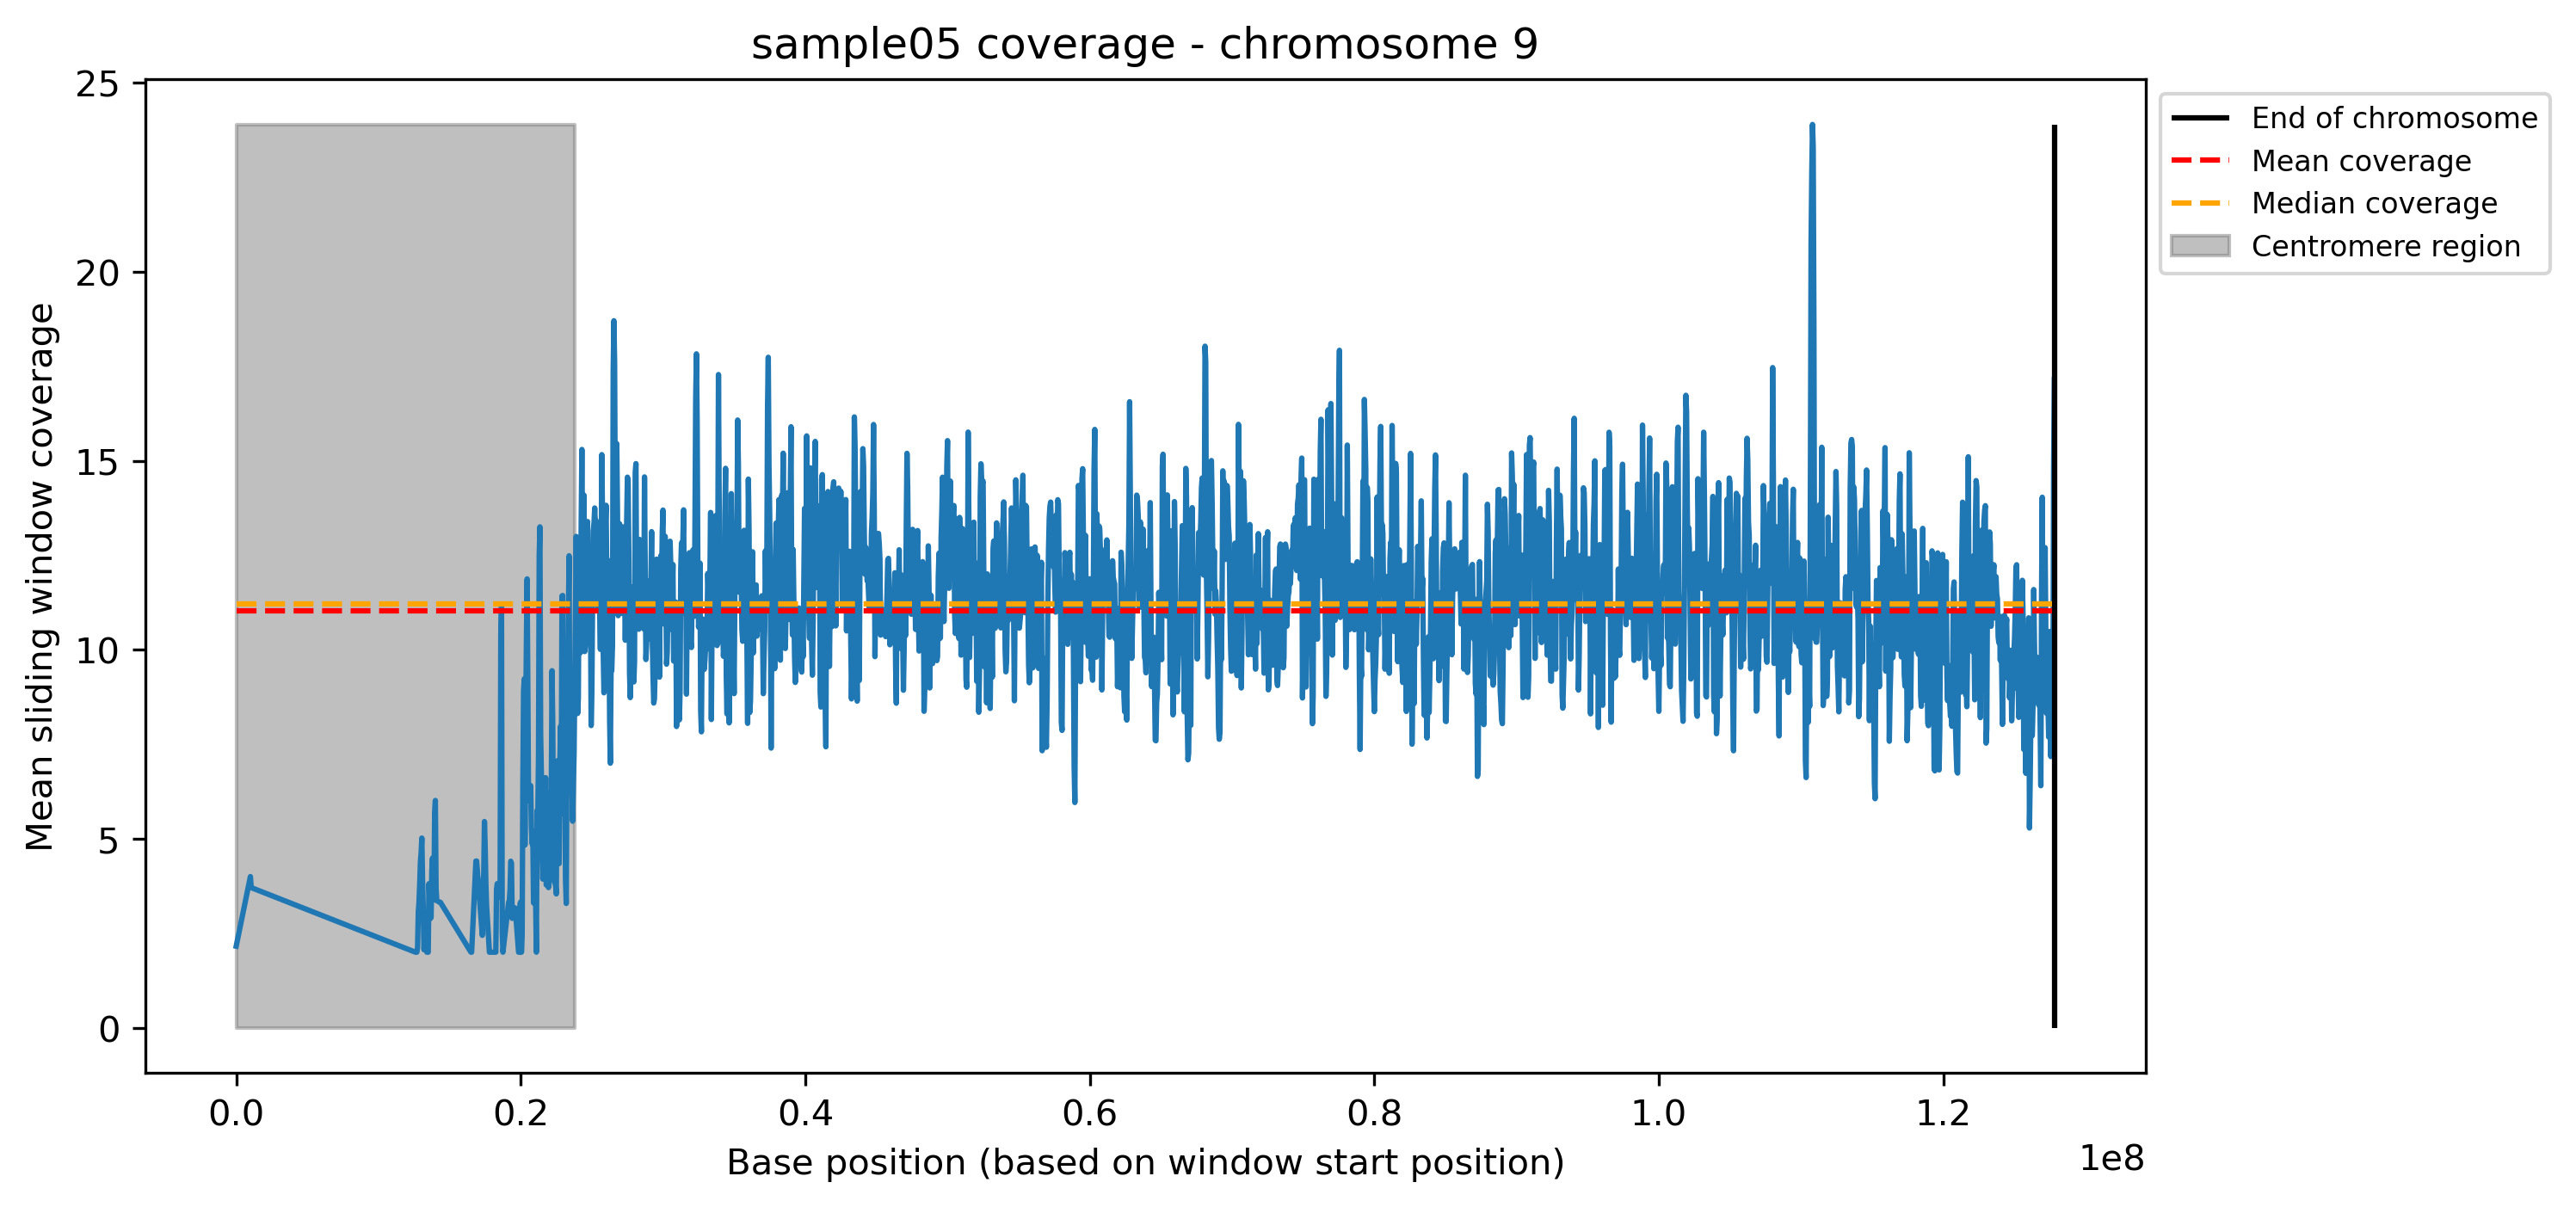

In [ ]:
# def plot_snp_coverage(plot_df: pd.DataFrame,
#                       sample_name: str,
#                       chrom_sizes_dict: dict,
#                       centromeres_dict: dict,
#                       output_dir: str,) -> None:
#     """
#     Function to plot SNP coverage for a given sample.

#     Parameters
#     ----------
#     plot_df : pd.DataFrame
#         DataFrame containing coverage data.
#     sample_name : str
#         Name of the sample.
#     chrom_sizes_dict : dict
#         Dictionary containing chromosome sizes.
#     centromeres_dict : dict
#         Dictionary containing centromere locations.
#     output_dir : str
#         Directory to save the plots.
#     """

#     # Create the output directory if it doesn't exist
#     os.makedirs(output_dir, exist_ok=True)
    
#     # Open the PDF file to save the plots to
#     pdf_path = os.path.join(output_dir,
#                             f'{SAMPLE_NAME}_coverage.pdf')
    
#     with PdfPages(pdf_path) as pdf:
        
#         fig = plt.figure(figsize=(8.5, 11))
#         plt.axis('off')  # Hide axes
        
#         # Add title and information text
#         plt.text(0.5, 0.9, f"SNP Coverage Analysis for {sample_name}", 
#                  ha='center', fontsize=20, weight='bold')
    
#         # Loop through each chromosome and plot the coverage
#         for chrom in tqdm(plot_df['chrom'].unique()):
        
#             plt.figure(figsize=(10,5), dpi = 300)
#             sns.lineplot(data=plot_df[plot_df['chrom'] == str(chrom)],
#                         x='window_start',
#                         y='coverage')
#             plt.title(f'{SAMPLE_NAME} coverage - chromosome {chrom}')
#             plt.xlabel('Base position (based on window start position)')
#             plt.ylabel('Mean sliding window coverage')


#             sns.lineplot(data=plot_df[plot_df['chrom'] == str(chrom)],
#                          x='window_start',
#                          y='coverage')
#             plt.title(f'{SAMPLE_NAME} coverage - chromosome {chrom}')
#             plt.xlabel('Base position (based on window start position)')
#             plt.ylabel('Mean sliding window coverage')

#             plt.vlines(x=chrom_sizes_dict[str(chrom)],
#                        ymin=0,
#                        ymax=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].max(),
#                        color='black',
#                        linestyle='-',
#                        label='End of chromosome')

#             plt.hlines(y=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].mean(),
#                        xmin=0,
#                        xmax=chrom_sizes_dict[str(chrom)],
#                        color='red',
#                        linestyle='--',
#                        label='Mean coverage')

#             plt.hlines(y=plot_df[plot_df['chrom'] == str(chrom)]['coverage'].median(),
#                        xmin=0,
#                        xmax=chrom_sizes_dict[str(chrom)],
#                        color='orange',
#                        linestyle='--',
#                        label='Median coverage')

#             # Add an opaque rectangle to the plot to highlight the centromere region
#             plt.fill_betweenx(y=[0, plot_df[plot_df['chrom'] == str(chrom)]['coverage'].max()],
#                               x1=centromeres_dict[str(chrom)][0],
#                               x2=centromeres_dict[str(chrom)][1],
#                               color='grey',
#                               alpha=0.5,
#                               label='Centromere region')

#             # Move the legend outside the plot
#             plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)